In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
file = Path('crypto_data.csv')

In [3]:
# Get the data file, load it into a dataframe and display:
DF = pd.read_csv(file, index_col=0)
DF.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# List all algorithms in use:
DF['Algorithm'].sort_values().unique()

array(['1GB AES Pattern Search', '536', 'Argon2', 'Argon2d',
       'Avesta hash', 'BLAKE256', 'Blake', 'Blake2S', 'Blake2b', 'C11',
       'Cloverhash', 'Counterparty', 'CryptoNight', 'CryptoNight Heavy',
       'CryptoNight Heavy X', 'CryptoNight-Lite', 'CryptoNight-V7',
       'CryptoNight-lite', 'Cryptonight-GPU', 'Curve25519', 'DPoS',
       'Dagger', 'Dagger-Hashimoto', 'ECC 256K1', 'Equihash',
       'Equihash+Scrypt', 'Equihash1927', 'Ethash', 'Exosis',
       'Green Protocol', 'Groestl', 'HMQ1725', 'HybridScryptHash256',
       'IMesh', 'Jump Consistent Hash', 'Keccak', 'Leased POS', 'Lyra2RE',
       'Lyra2REv2', 'Lyra2Z', 'M00N', 'M7 POW', 'Momentum', 'Multiple',
       'NIST5', 'NeoScrypt', 'Ouroboros', 'PHI1612', 'PHI2', 'POS 2.0',
       'POS 3.0', 'PoS', 'Progressive-n', 'Proof-of-Authority',
       'Proof-of-BibleHash', 'QUAIT', 'QuBit', 'Quark', 'QuarkTX',
       'Rainforest', 'SHA-256', 'SHA-256 + Hive', 'SHA-256D', 'SHA-512',
       'SHA3', 'SHA3-256', 'Scrypt', 'Scr

In [5]:
# Print the counts of stocks being currently traded vs. not being currently traded:
DF['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# Select only cryptocurrencies that are being traded:
DF = DF.loc[DF['IsTrading']==True]
DF['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [7]:
# Delete the IsTrading column; it is no longer necessary:
DF = DF.drop('IsTrading', axis=1)
DF.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
# Delete all rows with null values:
DF.dropna(inplace=True)
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


In [9]:
# Sort values in TotalCoinsMined to identify negative or zero values:
DF['TotalCoinsMined'].sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [10]:
# Select only rows with positive TotalCoinsMined values:
DF = DF.loc[DF['TotalCoinsMined']>0]
DF['TotalCoinsMined'].describe()

count    5.320000e+02
mean     5.340456e+09
std      4.564568e+10
min      4.199995e+01
25%      8.359849e+06
50%      2.474397e+07
75%      1.867250e+08
max      9.899887e+11
Name: TotalCoinsMined, dtype: float64

In [11]:
# Delete the CoinName column from the original dataframe:
DF = DF.drop('CoinName', axis=1)
DF.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
# Create dummy variables for columns with string values:
X = pd.get_dummies(data=DF, columns=['Algorithm', 'ProofType'])
print(f"{X.shape[0]} Rows by {X.shape[1]} Columns")
X.head()

532 Rows by 98 Columns


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Standardize the data:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Print the scaled data:
X_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [15]:
# Identify the numbers of rows and columns in the scaled data
print(f"{X_scaled.shape[0]} Rows by {X_scaled.shape[1]} Columns")

532 Rows by 98 Columns


### Reduce dataset dimensions with PCA

In [16]:
# Reduce dimensions with PCA keeping up to 90% of data:
pca = PCA(n_components=0.90)
principle_components = pca.fit_transform(X_scaled)
print(f"{principle_components.shape[0]} Rows by {principle_components.shape[1]} Columns")

532 Rows by 74 Columns


In [17]:
# Display the sum of the explained variance of the principal components:
pca.explained_variance_.sum()

88.4728345756615

In [18]:
# Reduce dimensions with t-SNE:
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principle_components)
print(f"{tsne_features.shape[0]} Rows by {tsne_features.shape[1]} Columns")

532 Rows by 2 Columns


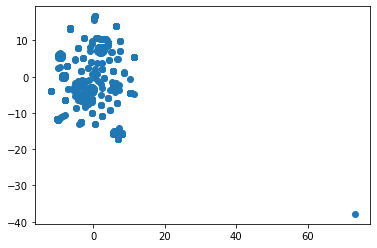

In [19]:
# Plot t-SNE output:
x = tsne_features[:,0]
y = tsne_features[:,1]
plt.scatter(x,y)
plt.show()

In [20]:
# Identify clusters with k-means:
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters=value, random_state=0)
    kmeans.fit(principle_components)
    inertia.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


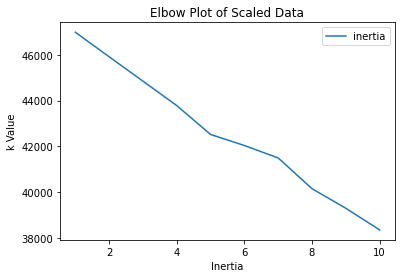

In [21]:
# Create an elbow plot:
plotDF = pd.DataFrame({"k": k, "inertia": inertia})
plotDF.plot.line(x="k", y="inertia")
plt.xlabel("Inertia")
plt.ylabel("k Value")
plt.title("Elbow Plot of Scaled Data")
plt.show()

### Conclusion:<br>

There doesn't seem to be any inflection point in the elbow curve.  This indicates that the K-Means model in conjunction with the dimension reduction was not able to find any clusters in this data set.  It is possible that another model might be able to find some clustering, but it is most likely that this data set truly did not possess any clusterable dimensions.  Also, if this data set was only a sampling from a larger population, it is possible that a resampling or a larger sample might contain some clusters.